## Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Implement a binary linear classifier on the first 2 dimensions of the iris dataset and plot its decision boundary

In [2]:
from sklearn import datasets, model_selection

data, targets = datasets.load_iris(return_X_y=True)
data = data[:100, :2] # only want the first 2 dimensions of the first 100 data entries
targets = targets[:100]

# training/testing split = 0.8/0.2
x_train, x_test, t_train, t_test = model_selection.train_test_split(data, targets, test_size=0.8, random_state=0)

The bias of the binary linear classifier is -5.968527502942984
The weight vector of the binary linear classifier is [ 1.80226162 -1.24492959]



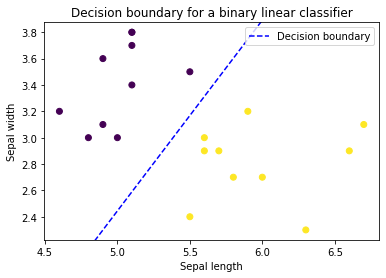

In [3]:
from sklearn import linear_model

def binary_classifier(x_train, t_train):
    # implement a binary linear classifier
    log_reg = linear_model.LogisticRegression(C=1)

    # train the model
    log_reg_clf = log_reg.fit(x_train, t_train)

    # plot the data points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    # find the decision function
    bias = log_reg_clf.intercept_[0]
    weights = log_reg_clf.coef_[0] # weights is in the form [w1, w2]
    w1, w2 = weights[0], weights[1]

    print("The bias of the binary linear classifier is {}".format(bias))
    print("The weight vector of the binary linear classifier is {}\n".format(weights))

    # (np.dot(wT, x) + b) = 0
    # w2x2 + w1x1 + b = 0
    # w2x2 = -w1x1 - b
    # x2 = 1/w2(-w1x1 - b)
    # so the slope of the decision boundary is -w2/w1 and the y-intercept is -b/w2
    slope = -w1/w2
    y_int = -bias/w2

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.array([xlim[0], xlim[1]])

    # decision boundary
    y = slope * x + y_int

    # plot the decision boundary
    plt.plot(x, y, 'k', c='blue', linestyle='dashed', label="Decision boundary") 

    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.title("Decision boundary for a binary linear classifier")
    plt.legend(loc = 'upper right')
    plt.show()

    return log_reg_clf

log_reg_clf = binary_classifier(x_train, t_train)

### 2. Accuracy of the binary linear classifier on the training and test data sets

In [4]:
training_accuracy = log_reg_clf.score(x_train, t_train)
test_accuracy = log_reg_clf.score(x_test, t_test)

print("The training accuracy is {}".format(training_accuracy))
print("The testing accuracy is {}".format(test_accuracy))

The training accuracy is 1.0
The testing accuracy is 0.9875


### 3. Implement a linear SVM classifier on the first 2 dimensions. Plot the decision boundary of the classifier and its margins
### 4. Circle the support vectors. Justify how to identify them through the duality theorem

Duality Theorem: Optimization problems like the Lagrangian can be solved by either solving the primal or the dual version.
Therefore, we can identify the support vectors (the points for which the dual optimization problem is maximized and for whom the dual variables are non-zero) by finding the solutions for the dual of the optimization problem.

The bias of the SVM classifier is -7.662778452658107
The weight vector of the SVM classifier is [ 3.33266363 -3.33342658]



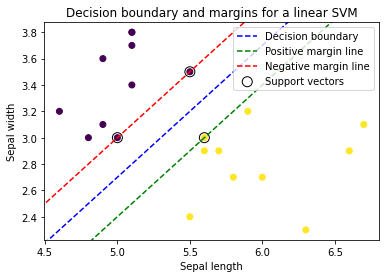

In [5]:
from sklearn import svm

def svm_classifier(x_train, t_train, plot=True):
    svm_clf = svm.SVC(kernel='linear', C=1000).fit(x_train, t_train) 

    # plot the data points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    # plot the support vector points
    plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100, linewidth=1, 
                facecolors='none', edgecolors='k', label='Support vectors')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.array([xlim[0], xlim[1]])

    # find the hyperplane
    bias = svm_clf.intercept_[0]
    weights = svm_clf.coef_[0] # weights is in the form [w1, w2]
    w1, w2 = weights[0], weights[1]
    print("The bias of the SVM classifier is {}".format(bias))
    print("The weight vector of the SVM classifier is {}\n".format(weights))

    # (np.dot(wT, x) + b) = 0
    # w2x2 + w1x1 + b = 0
    # w2x2 = -w1x1 - b
    # x2 = 1/w2(-w1x1 - b)
    # so the slope of the decision boundary is -w2/w1 and the y-intercept is -b/w2
    slope = -w1/w2
    y_int = -bias/w2
    y = slope * x + y_int
    plt.plot(x, y, 'k', c='blue', linestyle='dashed', label='Decision boundary') 

    # plot the negative and positive margins
    # 1. find the vector that's normal to the decision boundary -> weight vector
    # 2. find the weight unit vector: unit vector = vector / magnitude of vector
    weight_unit_vector = weights / np.linalg.norm(weights)

    # 3. find the margin: margin = 1/magnitude of weight vector
    margin = 1 / np.linalg.norm(weights)

    # 4. translate the points on the decision boundary to the negative and positive margins
    # points on the margin are the points (x, y) that satisfy y = -w1/w2 * x - bias/w2
    decision_boundary_points = list(zip(x, y))
    decision_boundary_points = np.array(decision_boundary_points) # convert list to NumPy array

    # positive margin: shift the points on the decision boundary by the magnitude of the positive margin and 
    # in the direction of the positive unit weight vector
    positive_margin_points = decision_boundary_points + weight_unit_vector * margin

    # negative margin: shift the points on the decision boundary by the magnitude of the negative margin and 
    # in the direction of the negative unit weight vector
    negative_margin_points = decision_boundary_points - weight_unit_vector * margin

    # plot the margins
    plt.plot(positive_margin_points[:, 0], positive_margin_points[:, 1], c='green', 
             linestyle='dashed', label='Positive margin line')
    plt.plot(negative_margin_points[:, 0], negative_margin_points[:, 1], c='red', 
             linestyle='dashed', label='Negative margin line')
   
    plt.title("Decision boundary and margins for a linear SVM")
    plt.legend(loc="upper right")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

    return svm_clf
svm_clf = svm_classifier(x_train, t_train)

### 5. Accuracy of the linear SVM classifier on both the training and test data sets

In [6]:
training_accuracy = svm_clf.score(x_train, t_train)
test_accuracy = svm_clf.score(x_test, t_test)

print("The training accuracy is {}".format(training_accuracy))
print("The testing accuracy is {}".format(test_accuracy))

The training accuracy is 1.0
The testing accuracy is 1.0


### 6. What is the value of the margin? Justify

From class, the value of the margin (distance from the positive margin line to the negative margin line) is 
$$ C = \frac{2}{||w||^{2}}$$

In [7]:
weights = svm_clf.coef_[0]
print("C = {}".format(2/np.linalg.norm(weights)))

C = 0.42430075463962524


### 7. Which vector is orthogonal to the decision boundary?

The equation for a plane in n dimensions is defined by the vector normal to the surface and a point on the plane.
In 2D, the plane is a line, and the line is defined by the vector normal to the surface and a point on the line.

The decision boundary is the set of points x which satisfy the equation 
$$ w^Tx + b = 0$$
where b is a scalar.

Therefore, the weight vector is orthogonal to the decision boundary.

### 8. Re-split the iris dataset with test_size = 0.4. Train the SVM classifier again. Does the decision boundary change? Test accuracy? Justify why

The bias of the SVM classifier is -17.32197688065553
The weight vector of the SVM classifier is [ 6.31804679 -5.26503723]



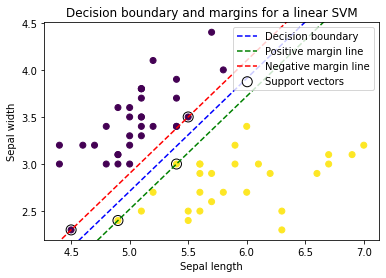


The re-split training accuracy is 1.0
The re-split testing accuracy is 1.0


In [8]:
# training/testing split = 0.6/0.4
x_train_resplit, x_test_resplit,t_train_resplit, t_test_resplit = model_selection.train_test_split(data, 
                                                                                                   targets, 
                                                                                                   test_size=0.4, 
                                                                                                   random_state=0)
svm_clf_resplit = svm_classifier(x_train_resplit, t_train_resplit)

# model testing
training_accuracy_resplit = svm_clf_resplit.score(x_train_resplit, t_train_resplit)
test_accuracy_resplit = svm_clf_resplit.score(x_test_resplit, t_test_resplit)

print("\nThe re-split training accuracy is {}".format(training_accuracy_resplit))
print("The re-split testing accuracy is {}".format(test_accuracy_resplit))

The test accuracy of the re-split training set did not change. However, the decision boundary changed because there are more points that are closer to the positive and negative lines (and an additional positive support vector point was found), so the residual is smaller. Therefore, the margin needs to be tighter.

### 9. Do the binary linear classifier and SVM have the same decision boundary?

Recall that the decision boundary is specified by the equation 
$$ w^Tx + b = 0$$
Both the binary linear classifier and the SVM share the same input data (i.e.: x), so the only variation in the decision boundary is because of differences in the bias b and the weight vector w.

The bias of the binary linear classifier is -5.968527502942985 and the weight vector of the binary linear classifier is [1.80226162 -1.24492959]

The bias of the SVM classifier with test_size=0.8 is -7.662778452658107 and the weight vector of the SVM classifier is [ 3.33266363 -3.33342658]

Since the biases and weights aren't equal, the decision boundaries aren't equal.

### 10. Re-train the SVM using all 150 entries of the dataset. How can you deal with the data points being non-linearly separable? Justify and plot the decision boundary of the new classifier

The bias of the SVM classifier is 17.316502614754814
The weight vector of the SVM classifier is [-6.31544482  5.26227596]



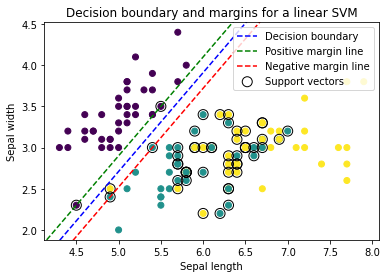


The training accuracy on all 150 data entries is 0.8333333333333334
The testing accuracy on all 150 data entries is 0.7333333333333333


In [9]:
data, all_targets = datasets.load_iris(return_X_y=True)

all_data = data[:, :2] # only want the first 2 dimensions of the first 150 data entries

# training/testing split = 0.8/0.2
x_train_all, x_test_all, t_train_all, t_test_all = model_selection.train_test_split(all_data, 
                                                                                    all_targets, 
                                                                                    test_size=0.2, 
                                                                                    random_state=0)

svm_all_points_clf = svm_classifier(x_train_all, t_train_all)

# model testing
training_accuracy_all = svm_all_points_clf.score(x_train_all, t_train_all)
test_accuracy_all = svm_all_points_clf.score(x_test_all, t_test_all)

print("\nThe training accuracy on all 150 data entries is {}".format(training_accuracy_all))
print("The testing accuracy on all 150 data entries is {}".format(test_accuracy_all))

Note: Ignore the plot, weights, and biases that were outputted above.
Because the data set is not linearly separable, the plot is not applicable anymore.
It's used more as a tool to visualize the non-linearly separable data.

The non-linearity can be resolved by using a non-linear SVM, which can be obtained by using a polynomial kernel.

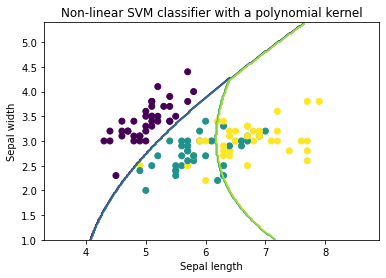


The training accuracy on all 150 data entries is 0.8416666666666667
The testing accuracy on all 150 data entries is 0.7333333333333333


In [10]:
def polynomial_svm(x_train, t_train):
    poly_svm = svm.SVC(kernel='poly', C=1)
    poly_svm_clf = poly_svm.fit(x_train, t_train)

    # plot the data points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    # make a meshgrid of points to plot in
    xval, yval = x_train[:, 0], x_train[:, 1]
    x_min, x_max = xval.min() - 1, xval.max() + 1
    y_min, y_max = yval.min() - 1, yval.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # make a set of predicted values which will be plotted
    y_train = poly_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_train = y_train.reshape(xx.shape)

    # draw the hyperplane curves separating the data points
    plt.contour(xx, yy, y_train)
    
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

    plt.title("Non-linear SVM classifier with a polynomial kernel")

    plt.show()

    return poly_svm_clf

poly_svm_clf = polynomial_svm(x_train_all, t_train_all)

# model testing
training_accuracy_all = poly_svm_clf.score(x_train_all, t_train_all)
test_accuracy_all = poly_svm_clf.score(x_test_all, t_test_all)

print("\nThe training accuracy on all 150 data entries is {}".format(training_accuracy_all))
print("The testing accuracy on all 150 data entries is {}".format(test_accuracy_all))